In [92]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import tensorflow as tf
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix, ConfusionMatrixDisplay

In [54]:
df = pd.read_csv('/Users/taddbackus/School/fall23/qtw/cs6/all_train.csv')

In [55]:
print(df)

         # label        f0        f1        f2        f3        f4        f5  \
0            1.0 -0.346368  0.416306  0.999236  0.475342  0.427493 -0.005984   
1            1.0  1.708236 -0.319394 -1.241873 -0.887231 -0.871906 -0.005984   
2            0.0 -0.360693  1.794174  0.264738 -0.472273 -0.292344 -1.054221   
3            1.0 -0.377914 -0.103932 -0.649434 -2.125015 -1.643797 -0.005984   
4            0.0 -0.067436 -0.636762 -0.620166 -0.062551  1.588715 -0.005984   
...          ...       ...       ...       ...       ...       ...       ...   
6999995      0.0  1.617264 -0.537084 -1.275867  0.650799 -1.511621  0.850488   
6999996      0.0 -0.511357  0.270927  0.085989 -0.243802 -1.035668 -0.005984   
6999997      1.0  0.062408 -0.987203  0.570667  1.517195  0.639548 -1.054221   
6999998      1.0  1.659131  1.096223  0.562821  1.627193  0.767236 -1.054221   
6999999      1.0  0.002034  0.744152 -0.908839 -0.770454  1.008405 -1.054221   

               f6        f7        f8  

In [57]:
del df

In [56]:
X = df.drop(columns=['# label'])
y = df['# label']
print(df.shape)
print(X.shape)
print(y.shape)

(7000000, 29)
(7000000, 28)
(7000000,)


In [58]:
#scaler = MinMaxScaler(feature_range=(0,1))
scaler = StandardScaler()
scaledTrain = scaler.fit_transform(X)

In [59]:
print(scaledTrain.shape)

(7000000, 28)


In [60]:
X_train, X_test, y_train, y_test = train_test_split(scaledTrain, y, test_size = 0.2)
X_predict, X_val, y_predict, y_val = train_test_split(X_test, y_test, test_size=0.5)

In [82]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

model = tf.keras.Sequential()
model.add(tf.keras.Input(shape=(28,)))
model.add(layers.Dense(128,activation='relu'))
model.add(layers.Dense(128,activation='relu'))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(1,activation='sigmoid'))



In [83]:
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss='binary_crossentropy',
              metrics=['accuracy'])
history = model.fit(X_train,
          y_train,
          epochs=100,
          batch_size=64,
          callbacks=[callback],
          validation_data=[X_val,y_val])

Epoch 1/100
87500/87500 [==============================] - 101s 1ms/step - loss: 0.2840 - accuracy: 0.8716 - val_loss: 0.2718 - val_accuracy: 0.8785
Epoch 2/100
87500/87500 [==============================] - 100s 1ms/step - loss: 0.2741 - accuracy: 0.8774 - val_loss: 0.2692 - val_accuracy: 0.8793
Epoch 3/100
87500/87500 [==============================] - 102s 1ms/step - loss: 0.2722 - accuracy: 0.8784 - val_loss: 0.2668 - val_accuracy: 0.8804
Epoch 4/100
87500/87500 [==============================] - 101s 1ms/step - loss: 0.2714 - accuracy: 0.8789 - val_loss: 0.2661 - val_accuracy: 0.8812
Epoch 5/100
87500/87500 [==============================] - 96s 1ms/step - loss: 0.2710 - accuracy: 0.8792 - val_loss: 0.2654 - val_accuracy: 0.8809
Epoch 6/100
87500/87500 [==============================] - 94s 1ms/step - loss: 0.2706 - accuracy: 0.8795 - val_loss: 0.2653 - val_accuracy: 0.8808
Epoch 7/100
87500/87500 [==============================] - 97s 1ms/step - loss: 0.2707 - accuracy: 0.8794 - 

In [84]:
print(model.summary())

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_37 (Dense)            (None, 128)               3712      
                                                                 
 dense_38 (Dense)            (None, 128)               16512     
                                                                 
 dropout_9 (Dropout)         (None, 128)               0         
                                                                 
 dense_39 (Dense)            (None, 64)                8256      
                                                                 
 dense_40 (Dense)            (None, 64)                4160      
                                                                 
 dropout_10 (Dropout)        (None, 64)                0         
                                                                 
 dense_41 (Dense)            (None, 1)                

In [85]:
loss, acc = model.evaluate(X_test,y_test)
print(acc)

43750/43750 [==============================] - 25s 582us/step - loss: 0.2655 - accuracy: 0.8815
0.8815135955810547


In [26]:
print(history.history)

{'loss': [0.2991272509098053, 0.2830711901187897, 0.2776387333869934, 0.27468058466911316, 0.27264603972435, 0.2712540924549103, 0.2701995074748993, 0.2693994343280792, 0.2687590718269348, 0.26825079321861267, 0.2677081823348999, 0.2673660218715668, 0.2669734060764313, 0.2666451036930084, 0.2663871943950653, 0.26616278290748596, 0.26583483815193176, 0.2656494677066803], 'accuracy': [0.859774649143219, 0.8697656989097595, 0.8732699751853943, 0.874929666519165, 0.8762496709823608, 0.8768731951713562, 0.8775885701179504, 0.8781303763389587, 0.8784443140029907, 0.8786507248878479, 0.879001796245575, 0.8791139125823975, 0.8795614242553711, 0.879532516002655, 0.8798078298568726, 0.8798821568489075, 0.8800035715103149, 0.8802242875099182], 'val_loss': [0.2839556336402893, 0.277997761964798, 0.27882710099220276, 0.27469033002853394, 0.27146491408348083, 0.2720358073711395, 0.2686973214149475, 0.26885712146759033, 0.26736775040626526, 0.2699614465236664, 0.2675265669822693, 0.26862460374832153,

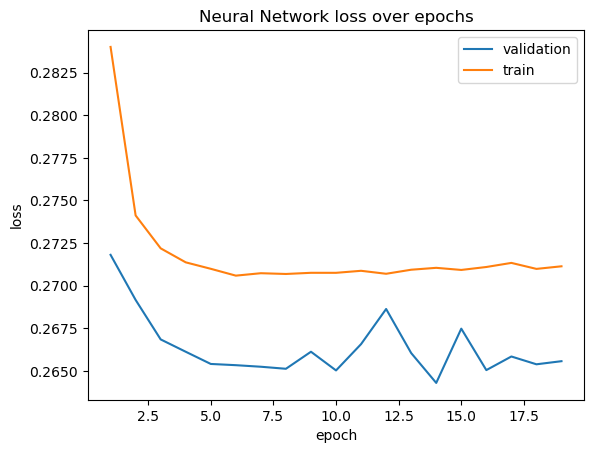

In [91]:
plt.plot(np.linspace(1,19,19),history.history['val_loss'],label='validation')
plt.plot(np.linspace(1,19,19),history.history['loss'],label='train')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('Neural Network loss over epochs')
plt.legend()
plt.show()

In [87]:
yPred = model.predict(X_predict)

21875/21875 [==============================] - 10s 458us/step


In [67]:
print(yPred)

[[7.9640156e-01]
 [2.5309420e-01]
 [4.7641079e-06]
 ...
 [5.2794421e-01]
 [2.9909967e-03]
 [3.9516715e-05]]


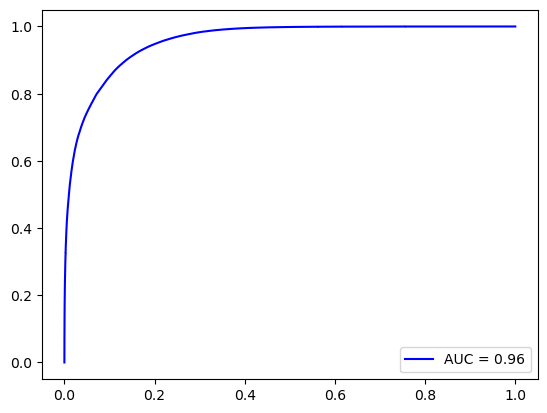

In [88]:
fpr, tpr, thresholds = roc_curve(y_predict,yPred)
roc_auc = roc_auc_score(y_predict,yPred)
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.show()

In [89]:
yPred = np.round(yPred).flatten()

conf_matrix = confusion_matrix(y_predict, yPred)

print('Confusion Matrix:')
print(conf_matrix)


Confusion Matrix:
[[299122  51621]
 [ 31455 317802]]


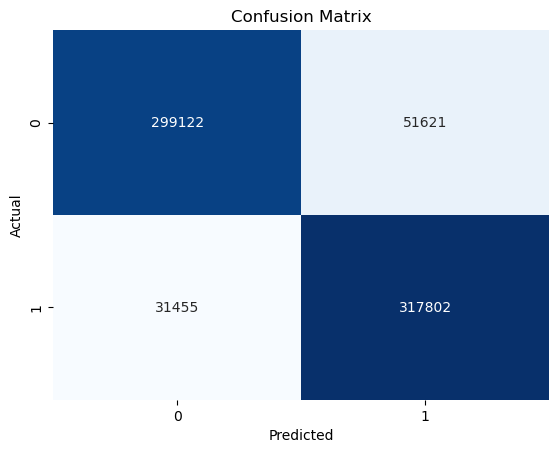

In [93]:
sns.heatmap(conf_matrix,
            annot=True,
            fmt = 'd',
            cmap = 'Blues',
            cbar = False,
            xticklabels = ['0','1',],
            yticklabels = ['0','1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

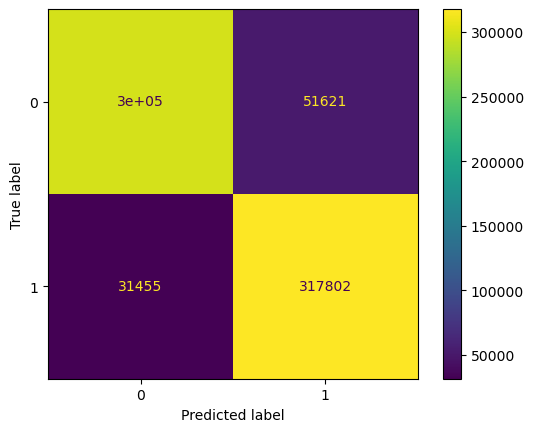

In [90]:

disp = ConfusionMatrixDisplay(conf_matrix)
disp.plot()
plt.show()